In [9]:
"""
Моделирование стержня из трех разных частей, 
чтобы в указанной точке стержня наблюдалась максимальная температура
"""


import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#начальные данные

#отрезок
a = 0
b = 3

#коэффициент перед u в уравнении
q = 3

#указанная точка, в которой должна быть максимальная температура
t0 = 0.6000000000000001

#значения на концах отрезка
ua = 5
ub = 3

#коэффициенты теплопроводности
k1 = lambda t : 0.5
k2 = lambda t : 3 * t + 0.5
k3 = lambda t : np.log(1.5 * t ** 2 + 14)

#производные от конфигураций
dk1 = lambda t : 0
dk2 = lambda t : 3
dk3 = lambda t : 3 * t / (1.5 * t ** 2 + 14)

#количество разбиений
count = lambda h : math.ceil((b - a) / h)

#массив шагов
T = lambda h : np.arange(a, b + h, h)

#функция правой части
f = lambda t: 1.5 * t**2 + t - 6

In [11]:
#составим возможные конфигурации коэффициентов

#123
def konfig1(t):
    if t >= 0 and t <= 1:
        return k1(t)
    if t > 1 and t <= 2:
        return k2(t)
    if t > 2 and t <= 3:
        return k3(t)
    else:
        return 0

    
#132
def konfig2(t):
    if t >= 0 and t <= 1:
        return k1(t)
    if t > 1 and t <= 2:
        return k3(t)
    if t > 2 and t <= 3:
        return k2(t)
    else:
        return 0


#213
def konfig3(t):
    if t >= 0 and t <= 1:
        return k2(t)
    if t > 1 and t <= 2:
        return k1(t)
    if t > 2 and t <= 3:
        return k3(t)
    else:
        return 0
    
    
#231
def konfig4(t):
    if t >= 0 and t <= 1:
        return k2(t)
    if t > 1 and t <= 2:
        return k3(t)
    if t > 2 and t <= 3:
        return k1(t)
    else:
        return 0

    
#312
def konfig5(t):
    if t >= 0 and t <= 1:
        return k3(t)
    if t > 1 and t <= 2:
        return k1(t)
    if t > 2 and t <= 3:
        return k2(t)
    else:
        return 0


#321
def konfig6(t):
    if t >= 0 and t <= 1:
        return k3(t)
    if t > 1 and t <= 2:
        return k2(t)
    if t > 2 and t <= 3:
        return k1(t)
    else:
        return 0

In [12]:
#метод прогонки
def running(h, konfig):
    t = np.arange(a, b + h, h)
    N = count(h) + 1
    solution = np.zeros(N)
    
    #коэффициенты матрицы
    A = lambda i : -konfig(i * h - h/2)
    B = lambda i : konfig(i * h - h/2) + konfig(i * h + h/2) + h**2 * q
    C = lambda i : - konfig(i * h + h/2)
    
    solution[0] = ua
    solution[N-1] = ub
    
    #массивы коэффициентов прогонки
    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)
    
    #прямой ход прогонки
    gamma[0] = B(1)
    alpha[0] = - C(1) / gamma[0]
    beta[0] = f(t[1]) * h**2 / gamma[0]
    for i in range(1, N-1):
        gamma[i] = B(i) + A(i) * alpha[i - 1]
        alpha[i] = - C(i) / gamma[i]
        beta[i] = (f(t[i]) * h**2 - A(i) * beta[i - 1]) / gamma[i]
    
    #обратный ход прогонки
    for i in reversed(range(1, N - 1)):
        solution[i] = alpha[i] * solution[i + 1] + beta[i]
        
    return solution


#вычисление погрешности по правилу Рунге
def runge(h, konfig):
    N = count(h) + 1
    R = np.zeros(N)
    for i in range(N):
        R[i] = abs(running(h/2, konfig)[2*i] - running(h, konfig)[i]) / 3
    return R    


#достижение заданной точности
def accuracy(h, konfig, eps):
    R = max(runge(h, konfig))
    while R > eps:
        h1 = h/2
        R = max(runge(h1, konfig))
        h = h1
    return h


#температура в точке t0 - входные параметры: шаг и вектор решений
def temperature(t, y):
    ind = t.tolist().index(t0)
    return y[ind]

In [13]:
#расчет для каждой конфигурации с одинаковым шагом шагом

h_common = 0.1

solution1 = running(h_common, konfig1)
solution2 = running(h_common, konfig2)
solution3 = running(h_common, konfig3)
solution4 = running(h_common, konfig4)
solution5 = running(h_common, konfig5)
solution6 = running(h_common, konfig6)

In [14]:
#массив точек с минимальным шагом - для построения графиков и поиска температуры в точке t0
T = np.arange(a, b + h_common, h_common)

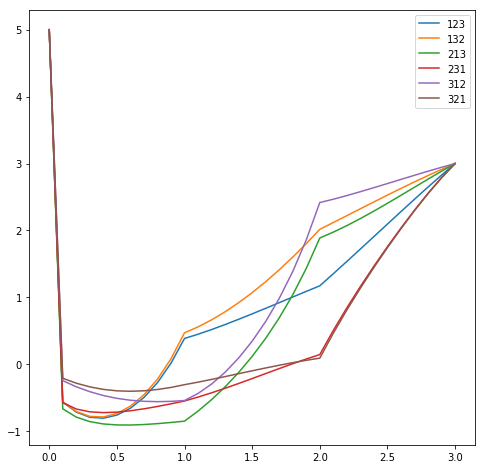

In [15]:
#графики приближенного решения при каждой конфигурации стержня

plt.rcParams["figure.figsize"] = (8, 8)

plot1, = plt.plot(T, solution1, label = "123");
plot2, = plt.plot(T, solution2, label = "132");
plot3, = plt.plot(T, solution3, label = "213");
plot4, = plt.plot(T, solution4, label = "231");
plot5, = plt.plot(T, solution5, label = "312");
plot6, = plt.plot(T, solution6, label = "321");

plt.legend([plot1, plot2, plot3, plot4, plot5, plot6], ['123', '132', '213', '231', '312', '321']);

In [16]:
#температура в точке t0 при каждой конфигурации
t1 = temperature(T, solution1)
t2 = temperature(T, solution2)
t3 = temperature(T, solution3)
t4 = temperature(T, solution4)
t5 = temperature(T, solution5)
t6 = temperature(T, solution6)

temperatures = np.array([t1, t2, t3, t4, t5, t6])

t_max = max(temperatures)

print("Температура в точке t0 при каждой конфигурации стержня:\n", temperatures)
print("\n")
print("Максимальное значение температуры в точке t0: ", t_max)

Температура в точке t0 при каждой конфигурации стержня:
 [-0.65555921 -0.62459912 -0.90644071 -0.69337035 -0.53590572 -0.40200437]


Максимальное значение температуры в точке t0:  -0.4020043678340288
